In [9]:
%cd ../

/home/starminalush/study/mfdp-2023


In [10]:
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [11]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

1. Вывод всех классов в датасете

In [12]:
dataset_path=Path('data/external/fer2013')

In [13]:
for sample in ['train', 'test']:
    print(f"Классы подвыборки {sample}: {[f.name for f in (dataset_path / sample).iterdir() if f.is_dir()]}")

Классы подвыборки train: ['angry', 'disgust', 'surprise', 'neutral', 'sad', 'happy', 'fear']
Классы подвыборки test: ['angry', 'disgust', 'surprise', 'neutral', 'sad', 'happy', 'fear']


Вывод: в каждой подвыборке 7 классов

2. Проверка баланса классов. При этом объединим все классы с негативными эмоциями в один класс - badmood

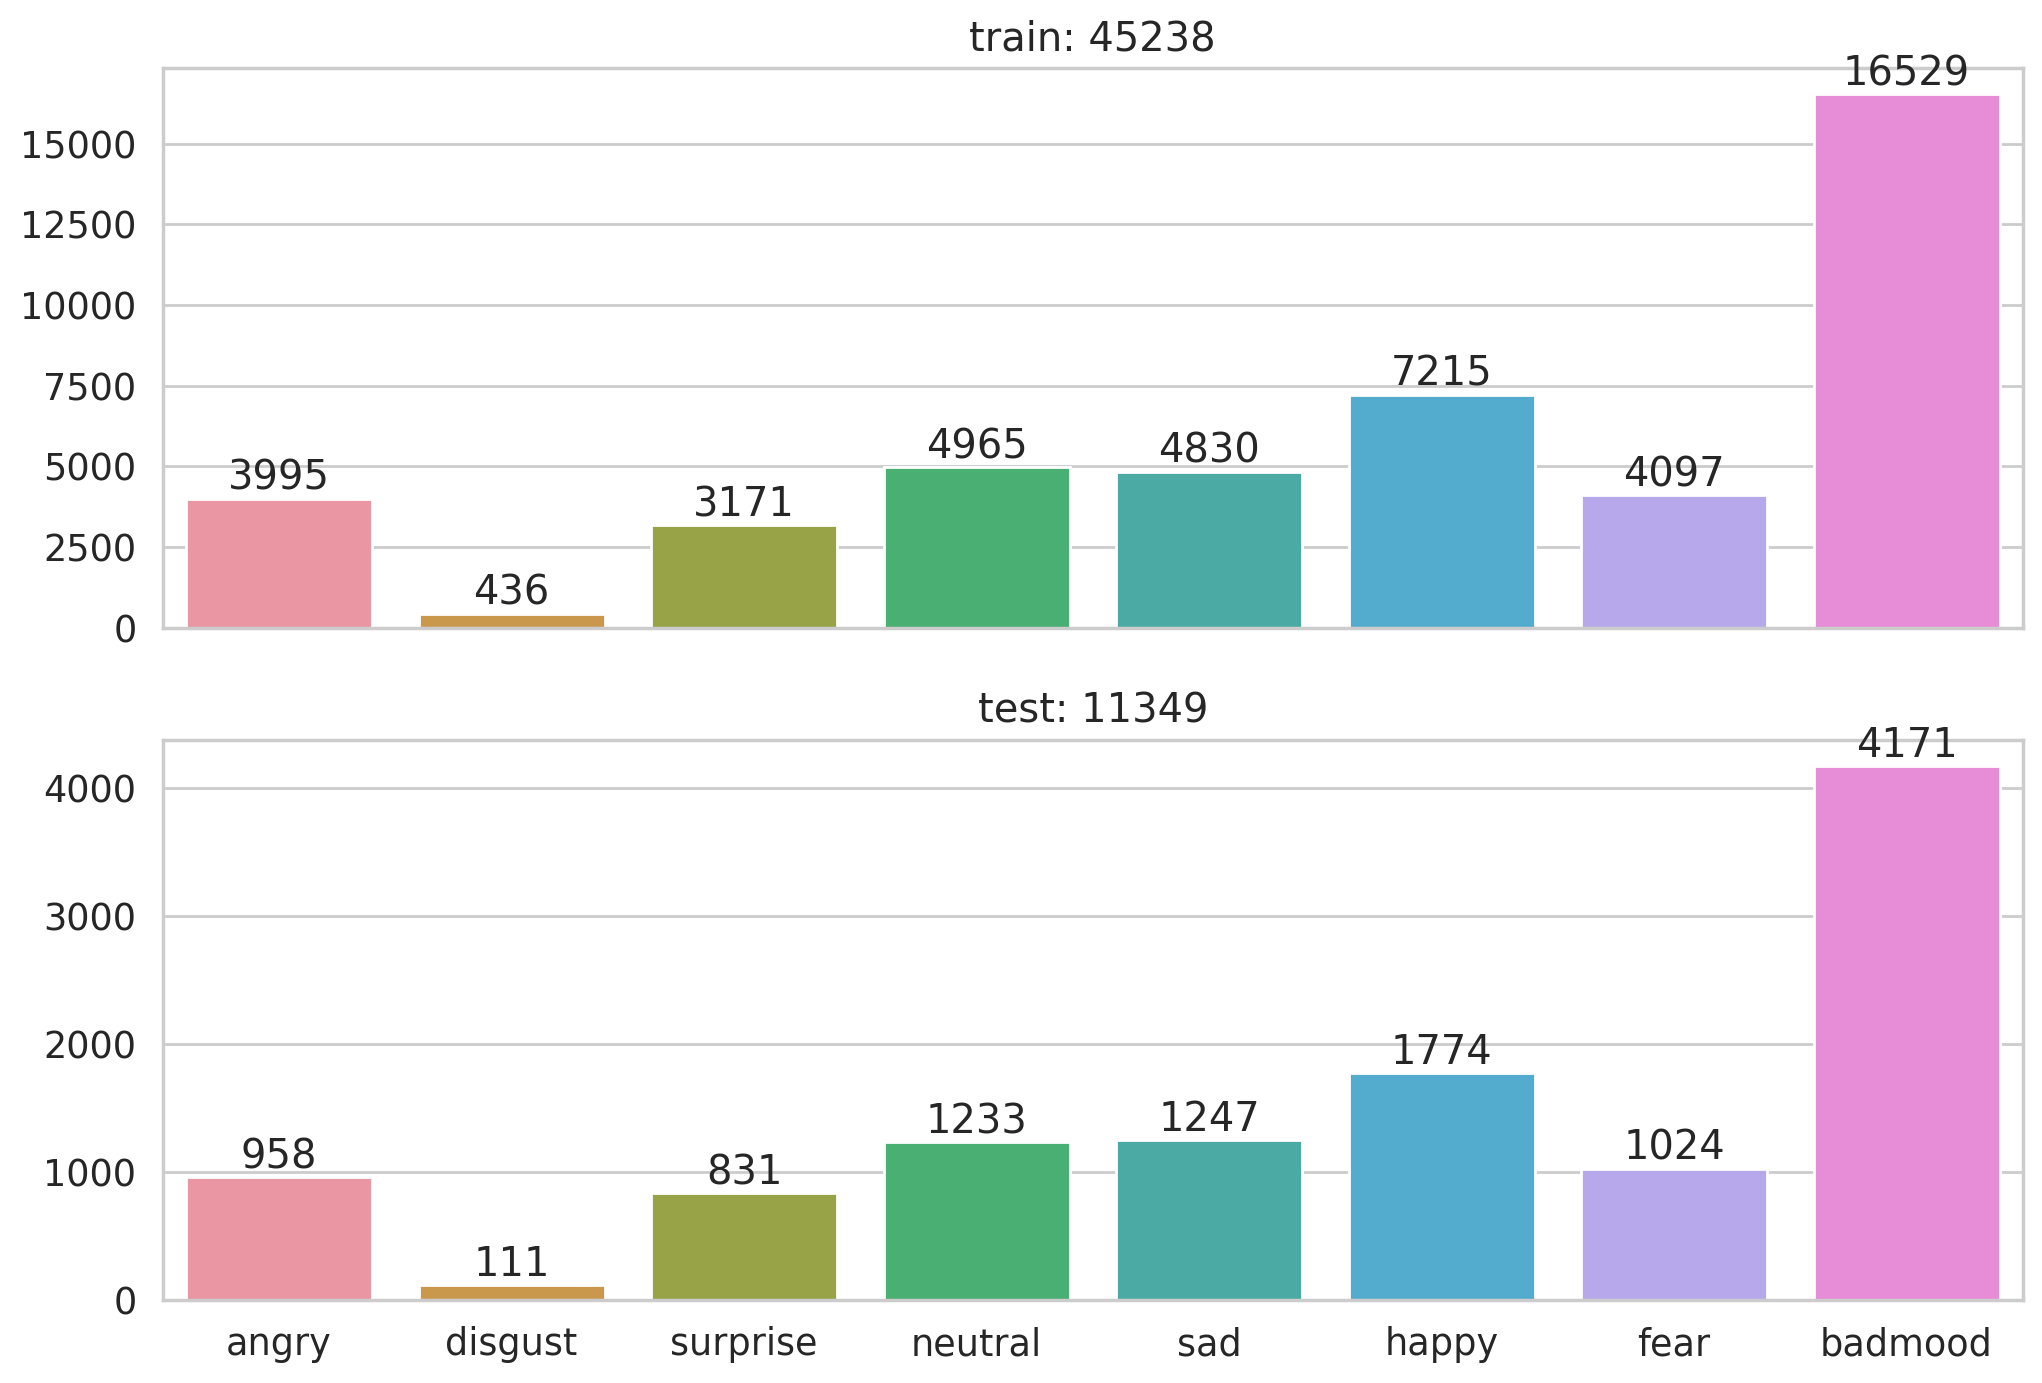

In [19]:
fig,ax = plt.subplots(2,1, figsize=(12,8), sharex=True)
for i, sample in enumerate(['train', 'test']):
    sample_data  = {f.name: len([*f.iterdir()]) for f in (dataset_path / sample).rglob("*") if f.is_dir()}
    sample_data['badmood'] = sample_data['angry'] + sample_data['disgust'] + sample_data['fear']  + sample_data['sad'] + sample_data['surprise']
    plt.sca(ax[i])
    sns_ax = sns.barplot(x=list(sample_data.keys()), y=list(sample_data.values()))
    sns_ax.bar_label(sns_ax.containers[0], fmt='%i')
    ax[i].set_title(f"{sample}: {sum(sample_data.values())}")

Из данного графика можно сделать следующие выводы:
 - выборки несбалансированы по классам
 - меньше всего изображений для класса disgust, больше всего  - для класса happy(из исходной выборки)
 - датасет разбит на подвыборки train и test в отношении 80 к 20.

3. Визуализируем изображения

In [15]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(10, 10))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray') 



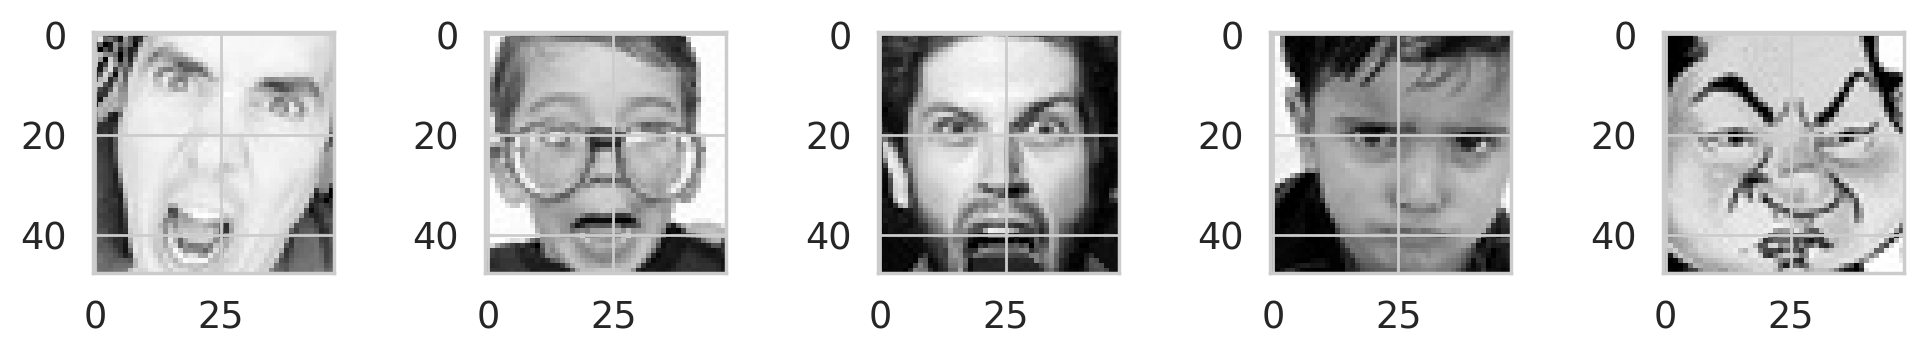

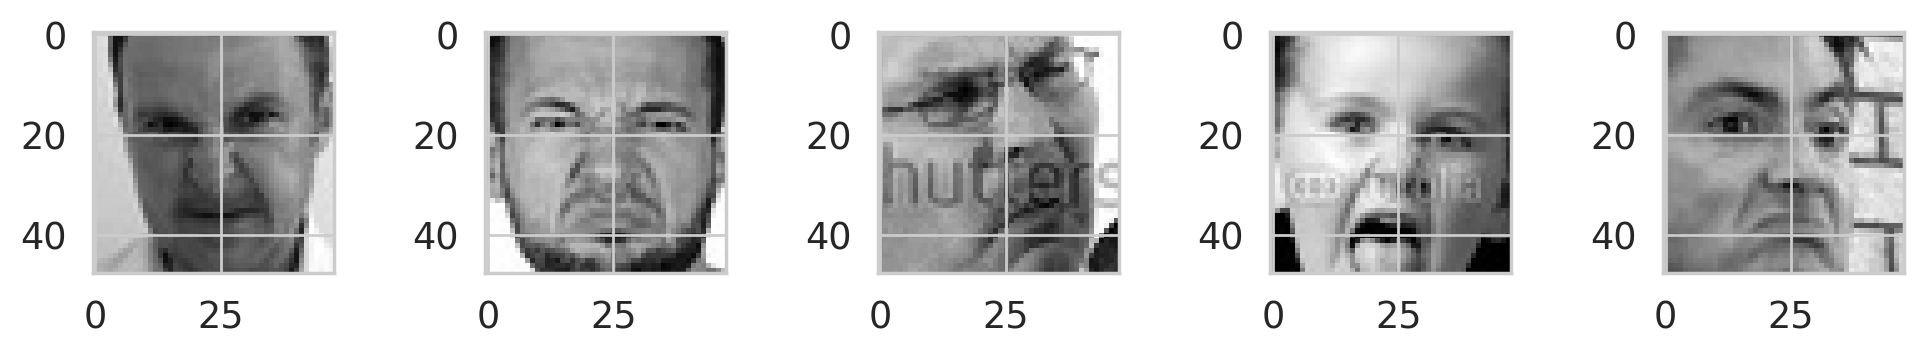

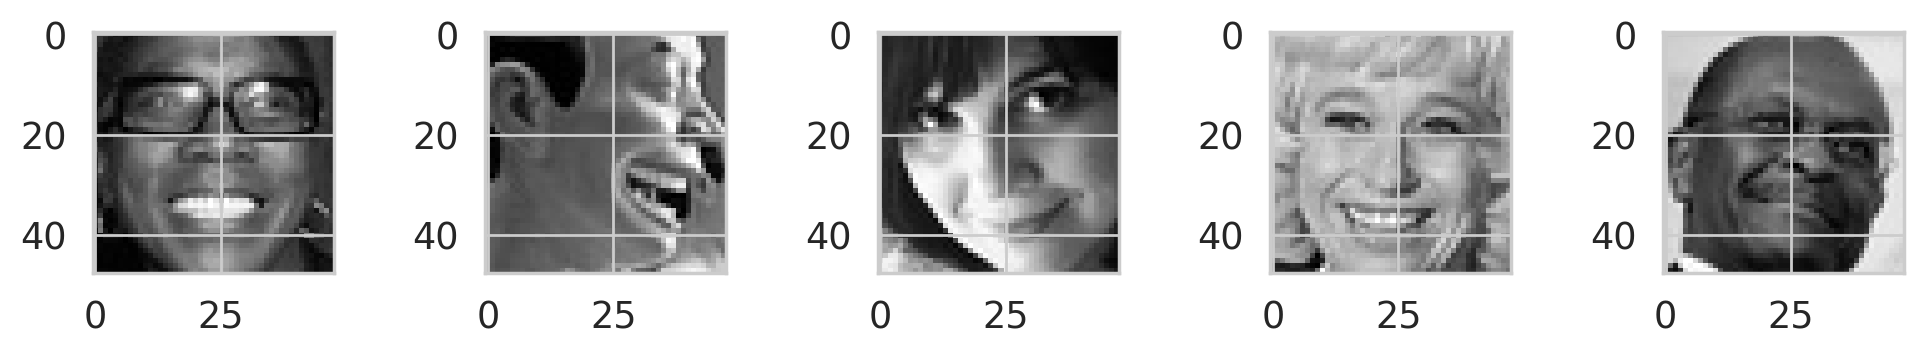

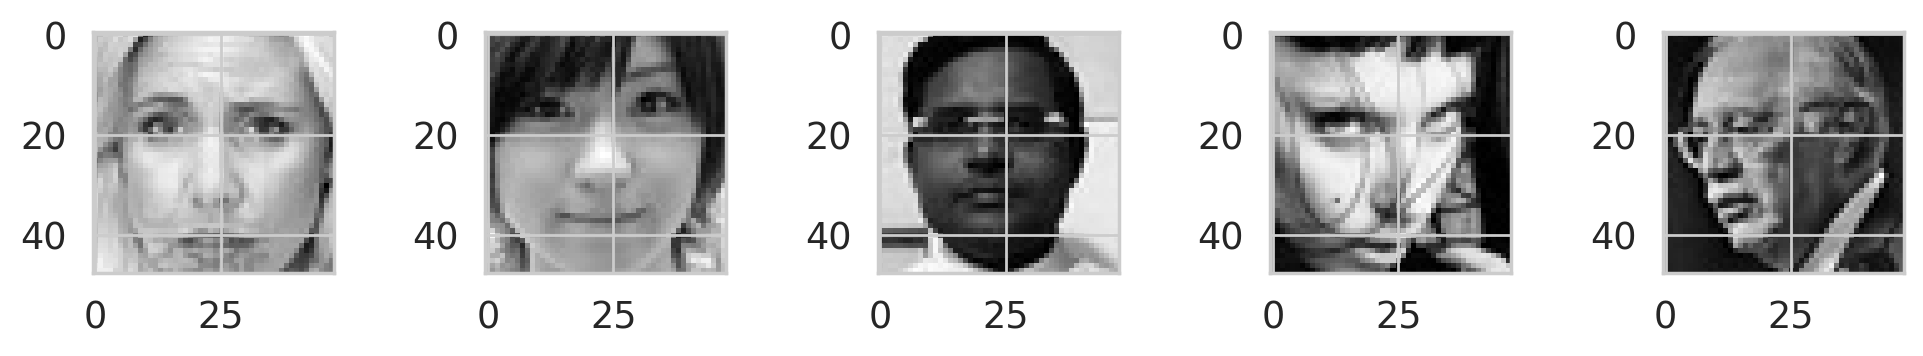

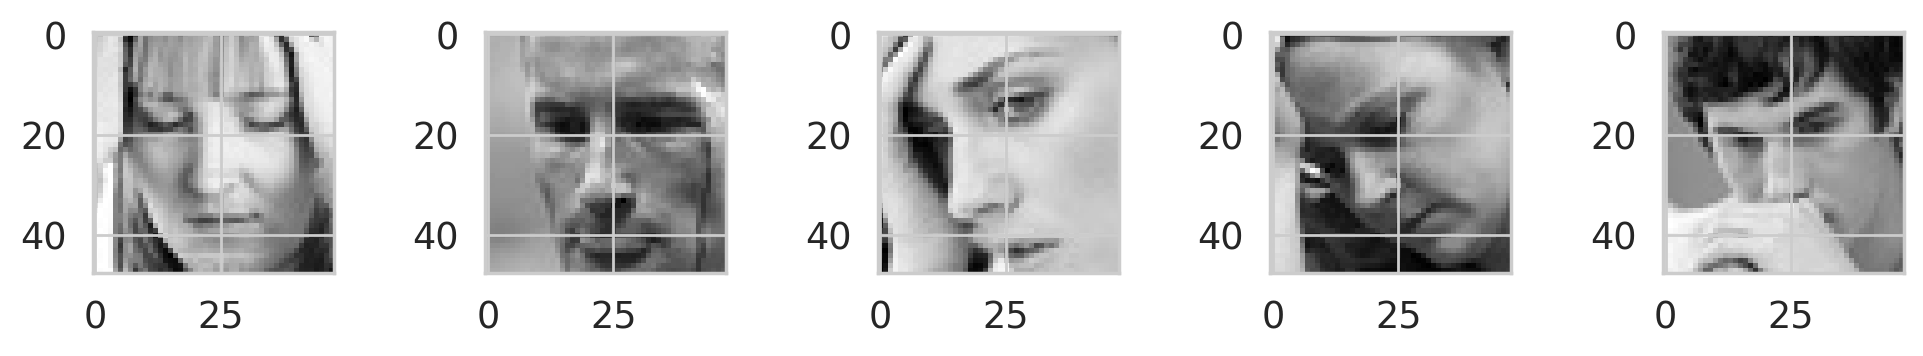

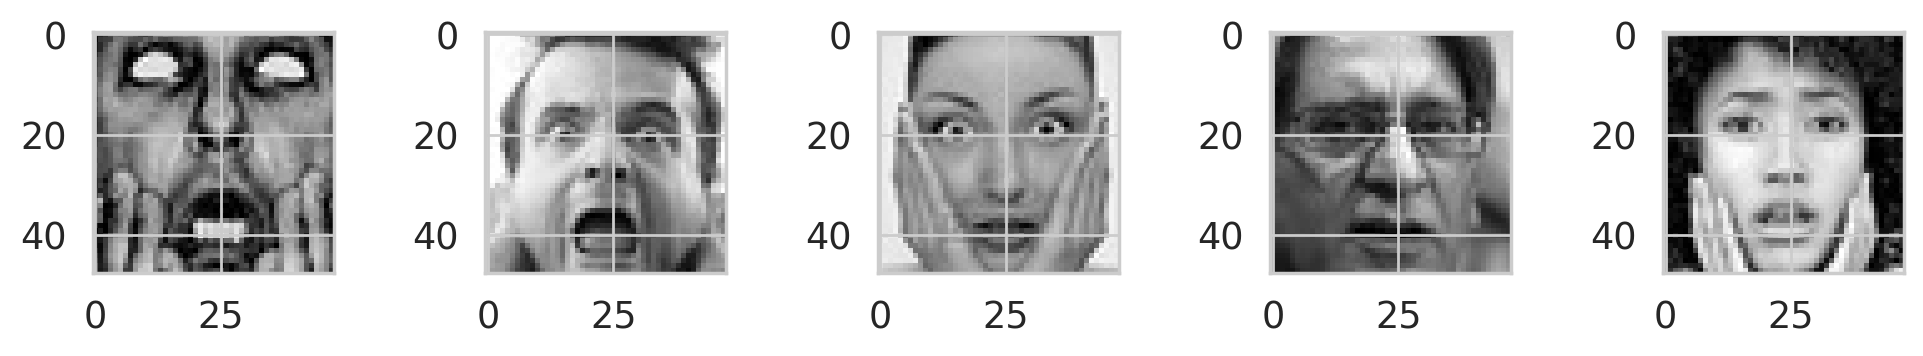

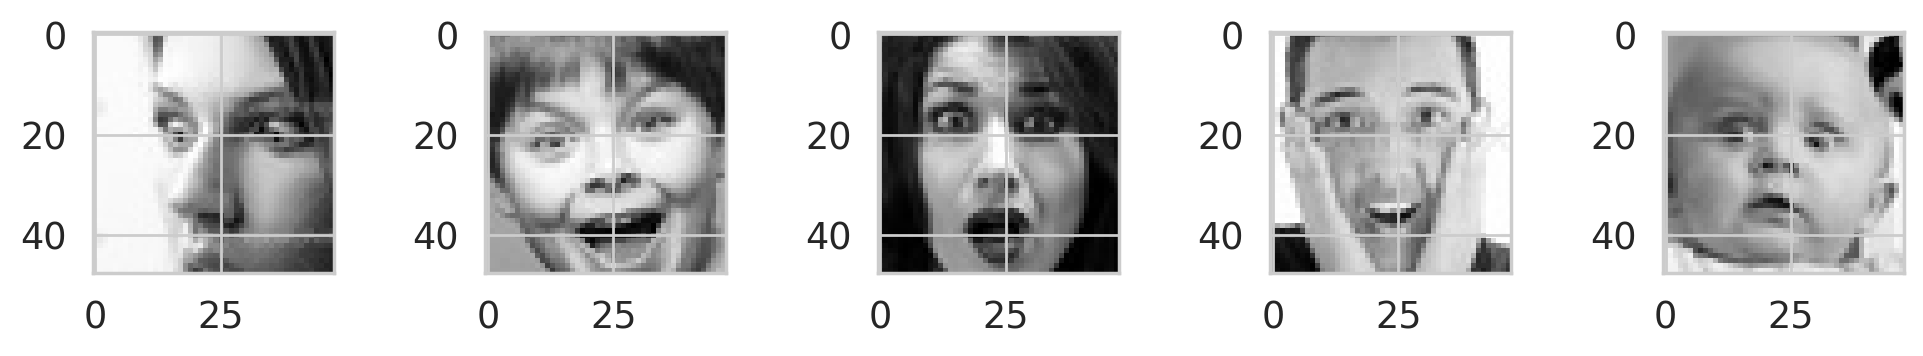

In [18]:
for cls in ['angry', 'disgust', 'happy', 'neutral', 'sad', 'fear', 'surprise']:
    plot_images(f'data/external/fer2013/test/{cls}')